## **Exercise III**

Name: Parsa Youssefpour

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
!pip install pyvirtualdisplay

In [ ]:
!sudo apt-get install xvfb

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Iterations that were run: 14


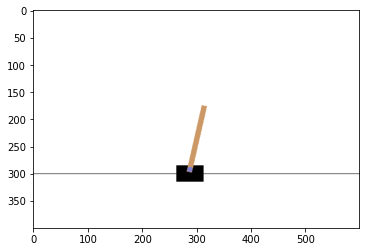

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

### **ON-Policy SARSA**

In [ ]:
import random
import numpy as np

In [ ]:
Q={}

#create a state to be used as dict key
def create_state(obs):
  #reducing the number of state by rounding the number of states
  state = [ '%.1f' % elem for elem in obs]
  return tuple(state)

# e-greedy policy
def SARSA_Policy(state,epsilon):
  if state not in Q.keys():
    Q[state] = [0,0]

  if random.random() > epsilon:
    return np.argmax(Q[state])
  else:
    return env.action_space.sample()

#SARSA Algorithm
def SARSA(alpha, gamma, epoch, epsilon):
    for i in range(1,epoch+1):
      obs = env.reset()
      done = False
      state = create_state(obs)
      action = SARSA_Policy(state, epsilon = epsilon)
      while not done:
        obs, reward, done, info = env.step(action)
        next_state = create_state(obs)
        next_action = SARSA_Policy(next_state, epsilon = epsilon)

        Q[state][action] += alpha*(reward + gamma*Q[next_state][next_action] - Q[state][action])

        state = next_state
        action = next_action

      if i % 100_000 == 0:
        print(f"Episode {i}")

    return Q

In [ ]:
env = gym.make("CartPole-v0",max_episode_steps=10_000)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
Q = SARSA(0.15,0.99,200_000,0.2)

Episode 0
Episode 100000


425 0
Iterations that were run: 424


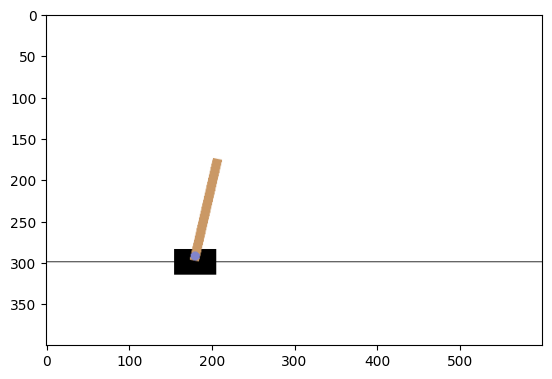

In [ ]:
#TESTING
env = gym.make("CartPole-v0", max_episode_steps=10000)
obs = env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
n_policy =0
n_random = 0
for i in range(50000):
  state = create_state(obs)
  print(state)
  try:
    action = np.argmax(Q[state])
    print(action)
    print("POLICY")
    n_policy+=1

  #if somehow the state has not been visited in the training, generate a random move
  except:
    print("random")
    action = env.action_space.sample()
    n_random+=1
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
print(n_policy,n_random)
print("Iterations that were run:",i)

### **Q Learning**

In [ ]:
import matplotlib.pyplot as plt
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
Q_q={}
rewards=[]

#e-greedy policy
def Q_policy(state, epsilon):
  if state not in Q_q.keys():
    Q_q[state] = [0,0]

  if random.random() > epsilon:
    return np.argmax(Q_q[state])
  else:
    return env.action_space.sample()

#Q-learning Algorithm
def Q_learning(alpha, gamma, epoch, epsilon):
  for i in range(1,epoch+1):
      obs = env.reset()
      done = False
      state = create_state(obs)
      sum_rewards = 0
      while not done:
        action = Q_policy(state, epsilon)
        obs, reward, done, info = env.step(action)
        next_state = create_state(obs)
        next_action = Q_policy(next_state, epsilon = epsilon)
        #keep track of the rewards collected in each episode
        sum_rewards += reward
        Q_q[state][action] += alpha*(reward + gamma*max(Q_q[next_state])- Q_q[state][action])

        state = next_state

      rewards.append(sum_rewards)


      if i % 100_000 == 0:
        print(f"Episode {i}")

        #save the Q values every 100_000 iterations
        with open('/content/drive/MyDrive/Q_q.csv', 'w', newline='') as file:
          writer = csv.writer(file)
          writer.writerow([i])
          for state, action in Q_q.items():
            writer.writerow([state,action[0],action[1]])

  return Q_q, rewards

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode 100000
Episode 200000


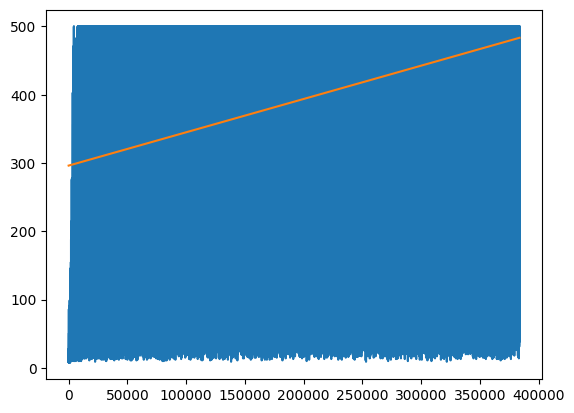

In [ ]:
Q_q, rewards = Q_learning(0.25,0.99,200_000,0.2)

#graphing the rewards collected in each episode
x = range(len(rewards))
slope, intercept = np.polyfit(x, rewards, 1)
plt.plot(rewards)
plt.plot(x, slope * np.array(x) + intercept)

500 0
Iterations that were run: 499


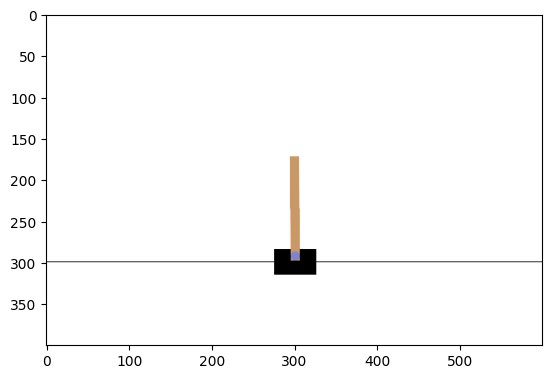

In [ ]:
#TESTING
env = gym.make("CartPole-v0", max_episode_steps=500)
obs = env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
n_policy =0
n_random = 0
for i in range(50000):
  state = create_state(obs)
  print(state)
  try:
    action = np.argmax(Q_q[state])
    print(action)
    print("POLICY")
    n_policy+=1

  #if somehow the state has not been visited in the training, generate a random move
  except:
    print("random")
    action = env.action_space.sample()
    n_random+=1
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
print(n_policy,n_random)
print("Iterations that were run:",i)

### **OFF POLICY EXPECTED SARSA**

In [ ]:

b={}
Q_ESarsa = {}
policy={}

#behavior policy and initializing the values for each visited state in the Q,
#policy and behavior policy dict
def behavior_policy(state):
  if state not in Q_ESarsa.keys():
    b[state] = [0.5,0.5]
    Q_ESarsa[state] = [0 , 0]
    policy[state] = [0.5,0.5]
  return b[state]

#Ecpected SARSA Algorithm
def Expected_Sarsa_Learning(alpha, gamma, epoch):
  for i in range(1,epoch+1):
      obs = env.reset()                                                         # initialize S
      done = False
      state = create_state(obs)
      b_probs = behavior_policy(state)
      action = np.random.choice(range(len(b_probs)), p=b_probs)                 # choose A from S
      while not done:
        obs, reward, done, info = env.step(action)                              # observe R, S'
        next_state = create_state(obs)
        b_probs = behavior_policy(next_state)
        next_action = np.random.choice(range(len(b_probs)), p=b_probs)          # choose A'

        Q_target=0
        for a in range(len(Q_ESarsa[next_state])):
          Q_target += policy[next_state][a]*Q_ESarsa[next_state][a]             # Get Q_target, weighted sum of Q values wrt. target policy

        Q_ESarsa[state][action] += alpha*(reward + gamma*Q_target - Q_ESarsa[state][action])    #update Q

        # update policy w.r.t. Q function
        best_action = np.argmax(Q_ESarsa[state])
        for j in range(len(Q_ESarsa[state])):
          if j == best_action:
            policy[state][j] = 1
          else:
            policy[state][j] = 0

        #update action and state
        state = next_state
        action = next_action

      if i % 100_000 == 0:
        print(f"Episode {i}")

        # saving Q every 100_000 iteration
        with open('/content/drive/MyDrive/Q_ES.csv', 'w', newline='') as file:
          writer = csv.writer(file)
          writer.writerow([i])
          for state, action in Q_ESarsa.items():
            writer.writerow([state,action[0],action[1]])

  return Q_ESarsa


In [ ]:
env = gym.make("CartPole-v0",max_episode_steps=10_000)

In [ ]:
Q_ESarsa = Expected_Sarsa_Learning(0.5,0.99,500_000)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode 100000
Episode 200000
Episode 300000
Episode 400000
Episode 500000


500 0
Iterations that were run: 499


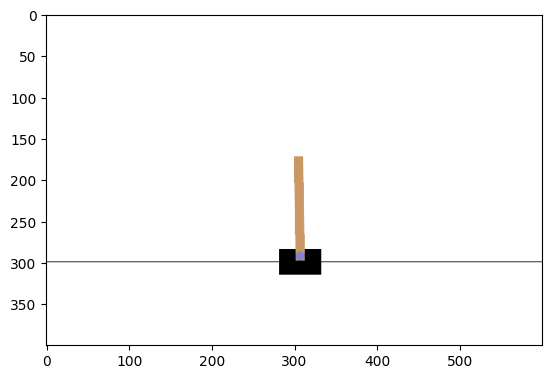

In [ ]:
#TESTING
env = gym.make("CartPole-v0", max_episode_steps=500)
obs = env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
n_policy =0
n_random = 0
for i in range(50000):
  state = create_state(obs)
  print(state)
  try:
    action = np.argmax(Q_ESarsa[state])
    print(action)
    print("POLICY")
    n_policy+=1

  #if somehow the state has not been visited in the training, generate a random move
  except:
    print("random")
    action = env.action_space.sample()
    n_random+=1
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
print(n_policy,n_random)
print("Iterations that were run:",i)